In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor



In [400]:
hd_dataset=pd.read_csv('/content/Heart_Disease_Prediction.csv')
hd_dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [401]:
hd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [402]:
hd_dataset.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [403]:
hd_dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.077778,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.201052,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,47.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,60.750000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,80.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


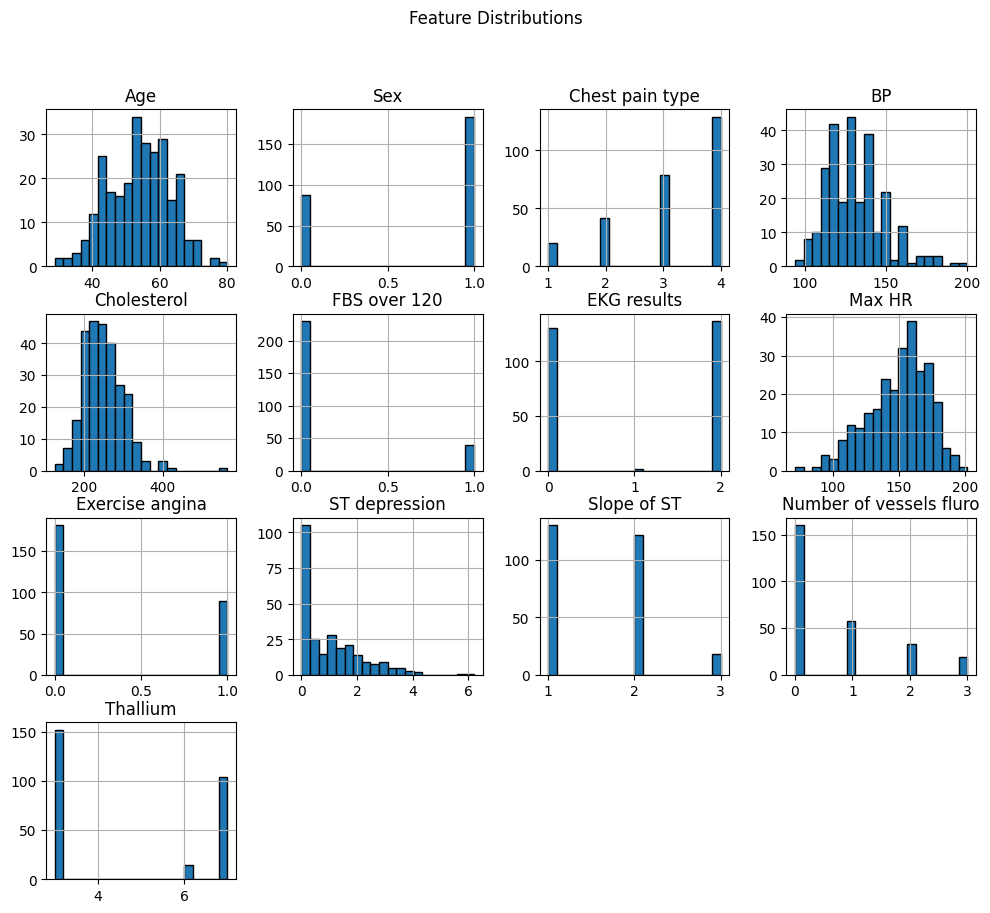

Target variable not found in dataset.


In [404]:
# Distribution of key numerical features
hd_dataset.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Countplot for target variable
target_col = 'target'  # Change if different
if target_col in hd_dataset.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=hd_dataset[target_col], palette='pastel')
    plt.title("Target Variable Distribution")
    plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()
else:
    print("Target variable not found in dataset.")


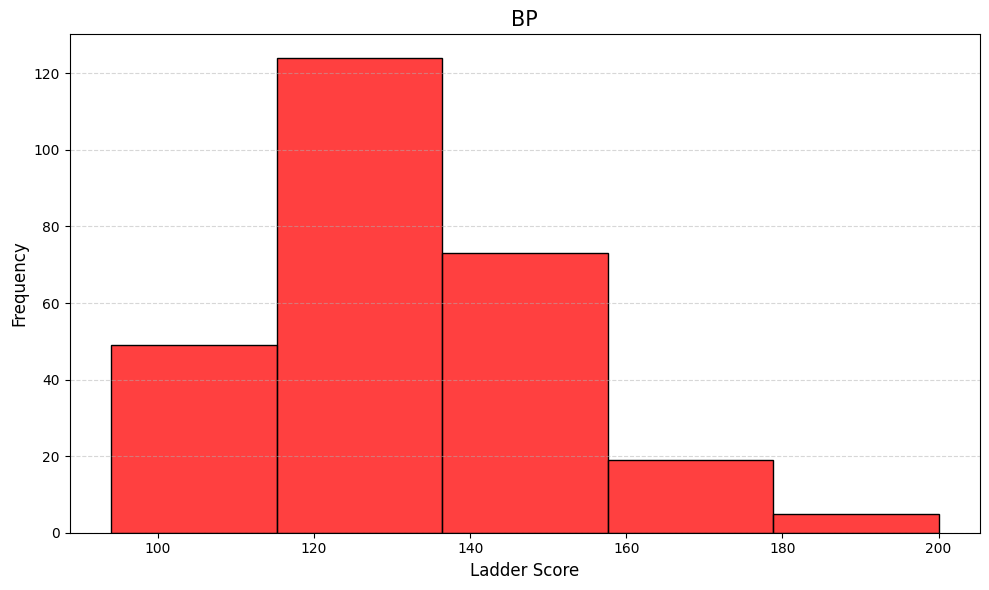

In [405]:
plt.figure(figsize=(10, 6))
sns.histplot(hd_dataset["BP"], bins=5, color='red')
plt.title("BP", fontsize=15)
plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [406]:
numeric_columns =hd_dataset.select_dtypes(include=['float64', 'int64']).columns
corr=hd_dataset[numeric_columns].corr()
corr

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.084770,0.092851,0.296292,0.285092,0.125882,0.144758,-0.348452,0.091004,0.205487,0.175391,0.359950,0.117915
Sex,-0.084770,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.092851,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.296292,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.285092,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.125882,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.144758,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.348452,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.091004,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.205487,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


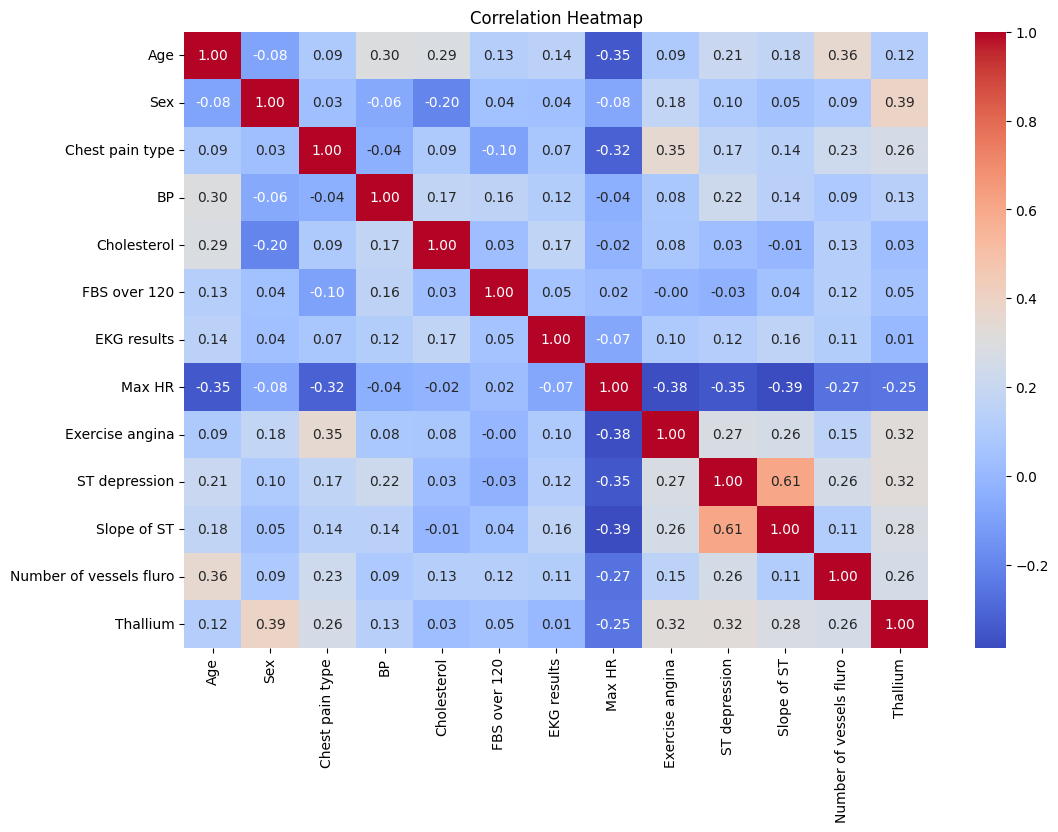

In [407]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


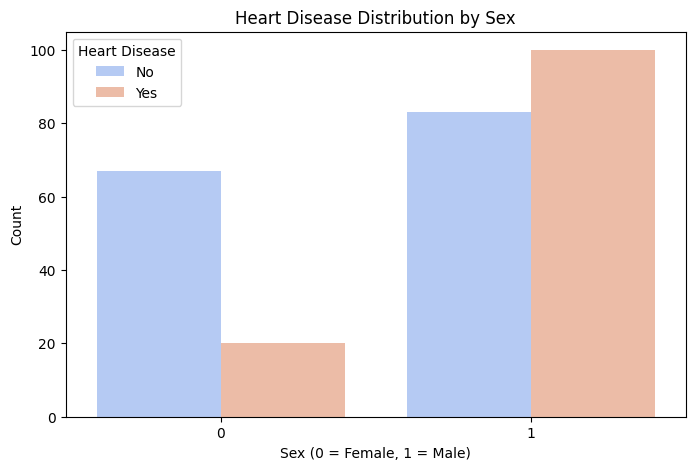

In [408]:
# Check the correct column names
print(hd_dataset.columns)

# Countplot: Heart Disease by Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=hd_dataset, x='Sex', hue='Heart Disease', palette='coolwarm')
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


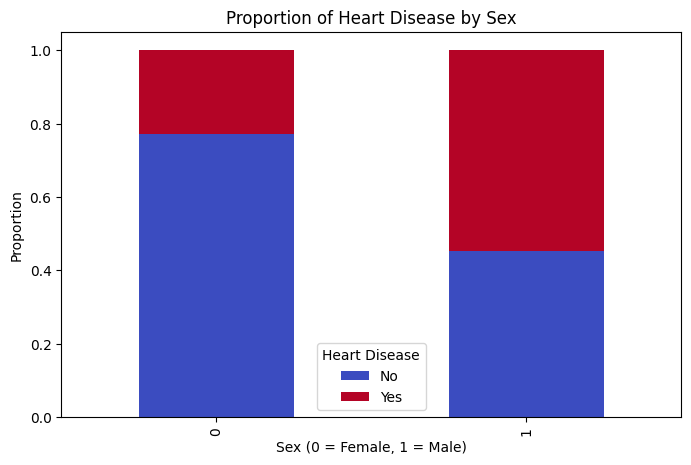

In [409]:
# Proportion of Heart Disease in Each Sex
sex_heart_disease = hd_dataset.groupby('Sex')['Heart Disease'].value_counts(normalize=True).unstack()
sex_heart_disease.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("Proportion of Heart Disease by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


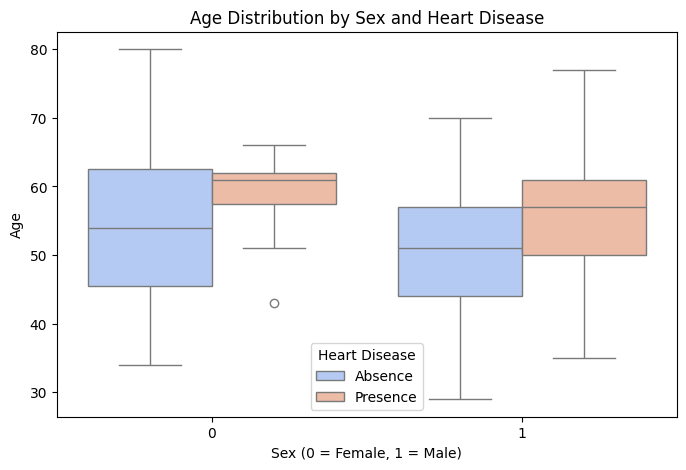

In [410]:
# Boxplot: Distribution of Age by Sex and Heart Disease
plt.figure(figsize=(8, 5))
sns.boxplot(data=hd_dataset, x='Sex', y='Age', hue='Heart Disease', palette='coolwarm')
plt.title("Age Distribution by Sex and Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Age")
plt.show()



<ipython-input-411-9bb9b611b014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hd_dataset['BP'], palette='viridis')


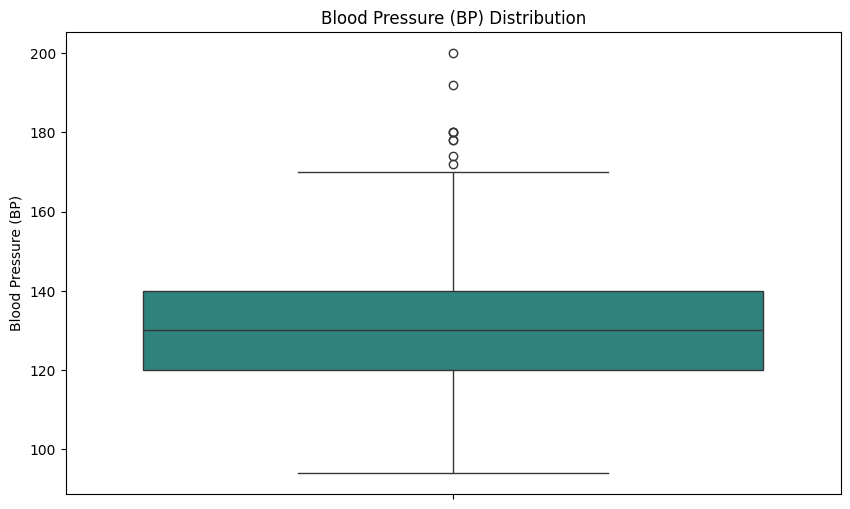

In [411]:
# Boxplot: Distribution of Blood Pressure (BP) with 'viridis' palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=hd_dataset['BP'], palette='viridis')
plt.title("Blood Pressure (BP) Distribution")
plt.ylabel("Blood Pressure (BP)")
plt.show()




**Classification Task:**
---

In [412]:
X = hd_dataset.drop(columns=['Heart Disease'])
y = hd_dataset['Heart Disease']

In [413]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (216, 13)
X_test shape: (54, 13)
y_train shape: (216,)
y_test shape: (54,)


# Build a Model from Scratch [5]:
For Classification Task, build a Appropriate Logistic Regression {Sigmoid or Softmax} from scratch, and report
the appropriate evaluation metrics on train and test set.

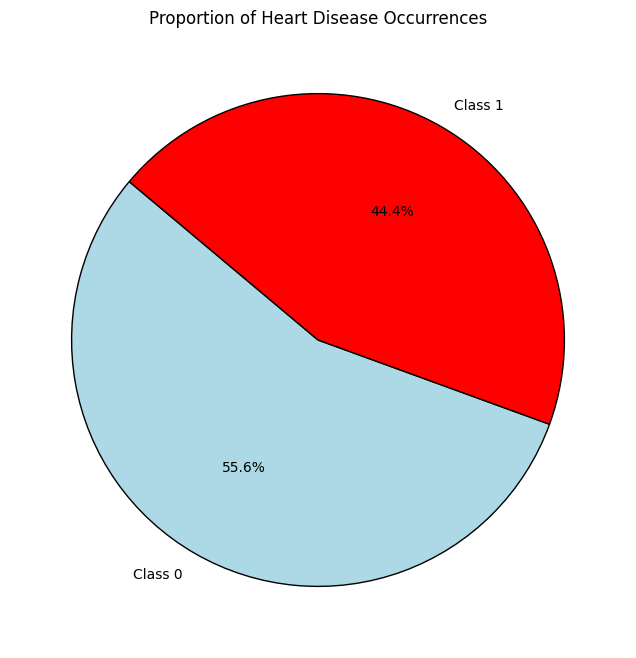

X_train shape: (216, 13)
X_test shape: (54, 13)
y_train shape: (216,)
y_test shape: (54,)


In [414]:
# Ensure hd_dataset exists and is a DataFrame
if not isinstance(hd_dataset, pd.DataFrame):
    raise ValueError("hd_dataset must be a Pandas DataFrame.")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium', 'Heart Disease']

# Encode categorical columns properly
for column in categorical_columns:
    if column in hd_dataset.columns:
        hd_dataset[column] = label_encoder.fit_transform(hd_dataset[column])
    else:
        raise KeyError(f"Column '{column}' not found in hd_dataset.")

# Define features (X) and target (y)
X = hd_dataset.drop(columns=['Heart Disease'])  # Features
y = hd_dataset['Heart Disease']  # Target

# Scale features (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the proportion of heart disease occurrences
heart_disease_counts = hd_dataset['Heart Disease'].value_counts(normalize=True).sort_index()

# Define labels dynamically based on unique values
labels = [f"Class {int(label)}" for label in heart_disease_counts.index]
colors = ['lightblue', 'red']

# Create pie chart to visualize the proportion of heart disease occurrences
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Heart Disease Occurrences")
plt.show()

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


In [415]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [416]:

# Loss Function
def calculate_loss(X, y, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    # Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    return loss

In [417]:
# Gradient Descent
def gradient_descent(X, y, y_pred):
    n_samples = len(y)
    dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
    db = (1 / n_samples) * np.sum(y_pred - y)
    return dw, db



In [418]:
def logistic_regression(X, y, lr=0.1, epochs=1000):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    # List to store the loss at each epoch
    loss_history = []

    # Gradient Descent Loop
    for epoch in range(epochs):
        # Compute predictions
        predictions = sigmoid(np.dot(X, weights) + bias)

        # Calculate gradients
        dw, db = gradient_descent(X, y, predictions)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        # Calculate and store the loss
        loss = calculate_loss(X, y, weights, bias)
        loss_history.append(loss)

        # Optionally print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias, loss_history

In [419]:
# Prediction Function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_pred])

In [420]:

def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }


In [421]:
weights, bias, loss_history = logistic_regression(X_train, y_train, lr=0.1, epochs=1000)

Epoch 0: Loss = 0.6558
Epoch 100: Loss = 0.3585
Epoch 200: Loss = 0.3512
Epoch 300: Loss = 0.3492
Epoch 400: Loss = 0.3484
Epoch 500: Loss = 0.3481
Epoch 600: Loss = 0.3479
Epoch 700: Loss = 0.3478
Epoch 800: Loss = 0.3478
Epoch 900: Loss = 0.3478


In [422]:

# Make Predictions
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

In [423]:

# Evaluate the Model
train_metrics = evaluate(y_train, y_train_pred)
test_metrics = evaluate(y_test, y_test_pred)


In [424]:
  # Calculate Loss
train_loss = calculate_loss(X_train, y_train, weights, bias)
test_loss = calculate_loss(X_test, y_test, weights, bias)

In [425]:
# Print Metrics
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Train Loss: {train_loss:.4f}")

Train Metrics:
Accuracy: 0.8380
Precision: 0.8333
Recall: 0.8081
F1 Score: 0.8205
Train Loss: 0.3478


In [426]:
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Metrics:
Accuracy: 0.9074
Precision: 0.9000
Recall: 0.8571
F1 Score: 0.8780
Test Loss: 0.3110


Primary Model

In [427]:
# Initialize logistic regression model
lr = LogisticRegression()

# Fit the model on training data
lr.fit(X_train, y_train)

# Predict on training and test data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calculate accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Print accuracy results
print(f"Accuracy on training set: {acc_train*100:.3f} %")
print(f"Accuracy on testing set: {acc_test*100:.3f} %")

# Print confusion matrix for training and testing sets
print("\nConfusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_pred_train))

print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report for training and testing sets
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred_test))


Accuracy on training set: 83.796 %
Accuracy on testing set: 92.593 %

Confusion Matrix (Training Set):
[[101  16]
 [ 19  80]]

Confusion Matrix (Testing Set):
[[32  1]
 [ 3 18]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       117
           1       0.83      0.81      0.82        99

    accuracy                           0.84       216
   macro avg       0.84      0.84      0.84       216
weighted avg       0.84      0.84      0.84       216


Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [428]:
# Initialize KNN classifier (you can adjust the number of neighbors, e.g., n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on training data
knn.fit(X_train, y_train)

# Predict on training and test data
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Calculate accuracy
acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)

# Print accuracy results
print(f"Accuracy on training set (KNN): {acc_train_knn*100:.3f} %")
print(f"Accuracy on testing set (KNN): {acc_test_knn*100:.3f} %")

# Print confusion matrix for training and testing sets
print("\nConfusion Matrix (Training Set - KNN):")
print(confusion_matrix(y_train, y_pred_train_knn))

print("\nConfusion Matrix (Testing Set - KNN):")
print(confusion_matrix(y_test, y_pred_test_knn))

# Print classification report for training and testing sets
print("\nClassification Report (Training Set - KNN):")
print(classification_report(y_train, y_pred_train_knn))

print("\nClassification Report (Testing Set - KNN):")
print(classification_report(y_test, y_pred_test_knn))


Accuracy on training set (KNN): 84.722 %
Accuracy on testing set (KNN): 79.630 %

Confusion Matrix (Training Set - KNN):
[[102  15]
 [ 18  81]]

Confusion Matrix (Testing Set - KNN):
[[30  3]
 [ 8 13]]

Classification Report (Training Set - KNN):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.84      0.82      0.83        99

    accuracy                           0.85       216
   macro avg       0.85      0.84      0.85       216
weighted avg       0.85      0.85      0.85       216


Classification Report (Testing Set - KNN):
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.81      0.62      0.70        21

    accuracy                           0.80        54
   macro avg       0.80      0.76      0.77        54
weighted avg       0.80      0.80      0.79        54



Hyperparameter tunning

In [429]:
# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that are good for small datasets
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize logistic regression model
lr = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}


In [430]:
# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method for neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


Feature Selection

Selected feature indices: [ 7  8 11 12]
Selected feature names: Index(['Max HR', 'Exercise angina', 'Number of vessels fluro', 'Thallium'], dtype='object')
Feature scores: [1.40134733e+01 2.60652525e+01 5.65546098e+01 6.63061844e+00
 3.78566051e+00 7.13885763e-02 9.19082830e+00 5.69091106e+01
 5.71696192e+01 5.67291335e+01 3.44777901e+01 7.00983686e+01
 1.01559048e+02]


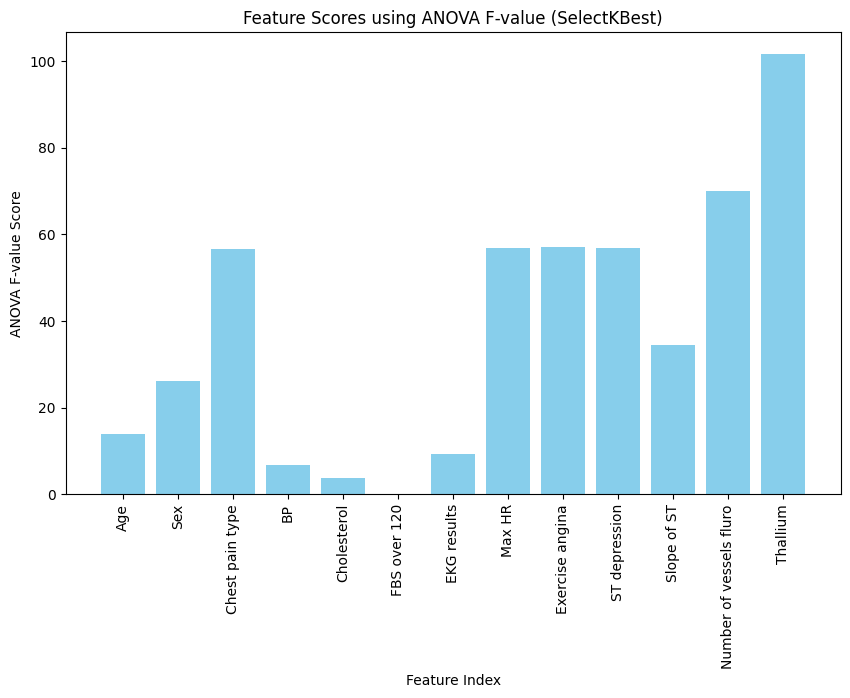

In [431]:
# Assuming the 'hd_dataset' DataFrame has already been defined
# Split the dataset into X (features) and y (target variable)
X = hd_dataset.drop(columns=['Heart Disease'])  # Assuming 'Heart Disease' is the target variable
y = hd_dataset['Heart Disease']

# Standardize the data first (important for methods like ANOVA F-value)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with f_classif as the score function (ANOVA F-value)
# k=5 means selecting the top 5 features
selector = SelectKBest(score_func=f_classif, k=4)  # Selecting top 4 features
X_selected = selector.fit_transform(X_scaled, y)

# Get the selected features (indices of the selected features)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print(f"Selected feature indices: {selected_feature_indices}")
print(f"Selected feature names: {selected_feature_names}")

# Optionally, print the scores of all features
feature_scores = selector.scores_
print(f"Feature scores: {feature_scores}")

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_scores)), feature_scores, color='skyblue')
plt.xlabel('Feature Index')
plt.ylabel('ANOVA F-value Score')
plt.title('Feature Scores using ANOVA F-value (SelectKBest)')
plt.xticks(range(len(feature_scores)), X.columns, rotation=90)  # Use feature names for x-ticks
plt.show()


Selected feature indices: [ 2  9 11 12]
Selected feature names: Index(['Chest pain type', 'ST depression', 'Number of vessels fluro',
       'Thallium'],
      dtype='object')
Feature ranking: [10  3  1  6  7  9  5  2  4  1  8  1  1]


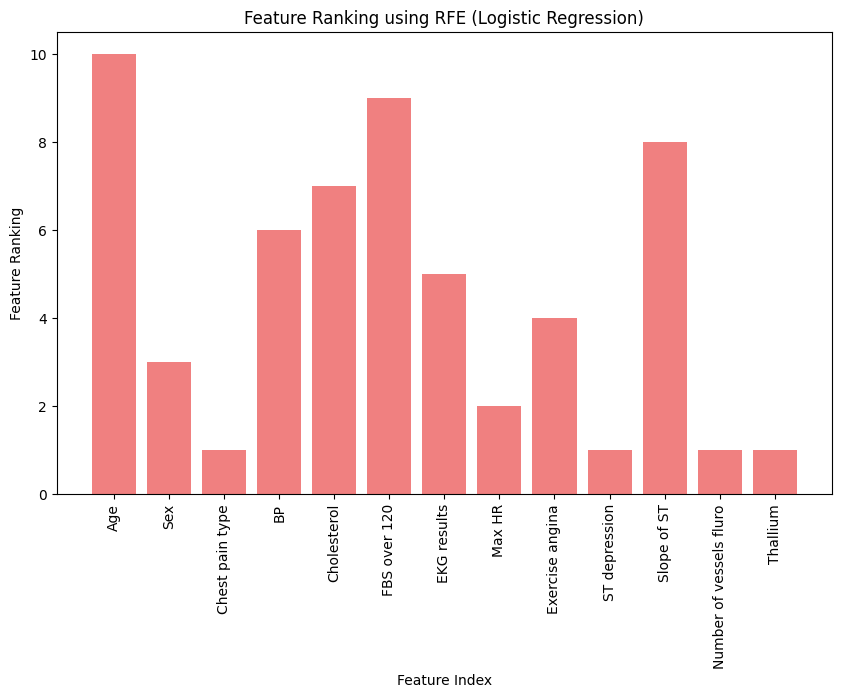

In [432]:
# Assuming the 'hd_dataset' DataFrame has already been defined
# Split the dataset into X (features) and y (target variable)
X = hd_dataset.drop(columns=['Heart Disease'])  # Assuming 'Heart Disease' is the target variable
y = hd_dataset['Heart Disease']

# Standardize the data first (important for models like logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model (you can replace it with other models)
model = LogisticRegression()

# Apply Recursive Feature Elimination (RFE) with logistic regression as the estimator
# Here, we select the top 4 features
rfe = RFE(estimator=model, n_features_to_select=4)
X_selected_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected features (indices of the selected features)
selected_feature_indices_rfe = rfe.get_support(indices=True)
selected_feature_names_rfe = X.columns[selected_feature_indices_rfe]
print(f"Selected feature indices: {selected_feature_indices_rfe}")
print(f"Selected feature names: {selected_feature_names_rfe}")

# Optionally, print the ranking of all features (1 means selected, higher values mean less important)
feature_ranking = rfe.ranking_
print(f"Feature ranking: {feature_ranking}")

# Plot the feature ranking
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_ranking)), feature_ranking, color='lightcoral')
plt.xlabel('Feature Index')
plt.ylabel('Feature Ranking')
plt.title('Feature Ranking using RFE (Logistic Regression)')
plt.xticks(range(len(feature_ranking)), X.columns, rotation=90)  # Use feature names for x-ticks
plt.show()


Final Model

In [433]:
# Assuming the 'hd_dataset' DataFrame has already been defined
# Select the top features
selected_features = ['Max HR', 'Exercise angina', 'Number of vessels fluro', 'Thallium']

# Extract the features and target variable
X_selected = hd_dataset[selected_features]
y = hd_dataset['Heart Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with best hyperparameters
lr = LogisticRegression(C=1, max_iter=100, solver='liblinear')
lr.fit(X_train_scaled, y_train)

# Predict on training and testing data
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# Calculate accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Print accuracy results
print(f"Accuracy on training set: {acc_train*100:.3f} %")
print(f"Accuracy on testing set: {acc_test*100:.3f} %")

# Print confusion matrix for training and testing sets
print("\nConfusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_pred_train))

print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report for training and testing sets
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred_test))


Accuracy on training set: 83.333 %
Accuracy on testing set: 88.889 %

Confusion Matrix (Training Set):
[[102  15]
 [ 21  78]]

Confusion Matrix (Testing Set):
[[31  2]
 [ 4 17]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       117
           1       0.84      0.79      0.81        99

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.83       216
weighted avg       0.83      0.83      0.83       216


Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Regression

In [434]:
X = hd_dataset.drop(columns=['BP'])
y = hd_dataset['BP']

Scratch

In [435]:
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.

    Parameters:
    X (ndarray): Feature matrix with bias term.
    y (ndarray): Target values.
    theta (ndarray): Model coefficients.

    Returns:
    float: Cost function value.
    """
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)

In [436]:
def gradient_descent(X, y, theta, learning_rate, epochs):
    """
    Perform gradient descent to minimize the cost function.

    Parameters:
    X (ndarray): Feature matrix with bias term.
    y (ndarray): Target values.
    theta (ndarray): Initial model coefficients.
    learning_rate (float): Learning rate for optimization.
    epochs (int): Number of iterations.

    Returns:
    tuple: Optimized theta values, cost history.
    """
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [437]:
def linear_regression(X, y, learning_rate=0.1, epochs=1000):
    """
    Train a multiple linear regression model using gradient descent.

    Parameters:
    X (ndarray): Feature matrix.
    y (ndarray): Target values.
    learning_rate (float, optional): Learning rate. Default is 0.1.
    epochs (int, optional): Number of iterations. Default is 1000.

    Returns:
    tuple: Optimized theta values, cost history.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (intercept)
    theta = np.zeros(X.shape[1])  # Initialize weights
    return gradient_descent(X, y, theta, learning_rate, epochs)


In [438]:
def predict(X, theta):
    """
    Make predictions using the trained linear regression model.

    Parameters:
    X (ndarray): Feature matrix.
    theta (ndarray): Model coefficients.

    Returns:
    ndarray: Predicted values.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    return np.dot(X, theta)


In [439]:
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def r2_score(y, y_pred):
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    """
    Compute RMSE, MAE, MSE, and R² score for regression evaluation on both train and test sets.

    Parameters:
    y_train (ndarray): Actual target values for training set
    y_train_pred (ndarray): Predicted target values for training set
    y_test (ndarray): Actual target values for test set
    y_test_pred (ndarray): Predicted target values for test set

    Returns:
    RMSE, MAE, MSE, and R² score for both train and test sets
    """
    metrics = {}

    # Train set evaluation
    metrics["Train RMSE"] = "{:.4f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    metrics["Train MAE"] = "{:.4f}".format(mean_absolute_error(y_train, y_train_pred))
    metrics["Train MSE"] = "{:.4f}".format(mean_squared_error(y_train, y_train_pred))
    metrics["Train R² Score"] = "{:.4f}".format(r2_score(y_train, y_train_pred))

    # Test set evaluation
    metrics["Test RMSE"] = "{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    metrics["Test MAE"] = "{:.4f}".format(mean_absolute_error(y_test, y_test_pred))
    metrics["Test MSE"] = "{:.4f}".format(mean_squared_error(y_test, y_test_pred))
    metrics["Test R² Score"] = "{:.4f}".format(r2_score(y_test, y_test_pred))

    return metrics


In [440]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias  # Compute predictions
            error = y_pred - y

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Define features (X) and target (y)
X = hd_dataset.drop(columns=['Heart Disease'])  # Keep all features except target
y = hd_dataset['Heart Disease']  # Define target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate Performance
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Linear Regression (Scratch) - Training Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"R-squared (R²): {train_r2:.4f}\n")

print("Linear Regression (Scratch) - Test Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")

# Print learned parameters
print(f"Weights: {model.weights}, Bias: {model.bias}")


Linear Regression (Scratch) - Training Evaluation:
Mean Squared Error (MSE): 0.1161
Mean Absolute Error (MAE): 0.2649
R-squared (R²): 0.5324

Linear Regression (Scratch) - Test Evaluation:
Mean Squared Error (MSE): 0.1081
Mean Absolute Error (MAE): 0.2758
R-squared (R²): 0.5450
Weights: [-0.01169062  0.0759451   0.08927375  0.04656233  0.02761137 -0.03826567
  0.01041413 -0.0323395   0.05635871  0.06831853  0.04412915  0.11037662
  0.10787165], Bias: 0.4394285520318901


Primary

In [441]:
#Initialize and train the Ridge Regression model with max_iter
lr = LinearRegression()  # Use Ridge instead of LinearRegression
lr.fit(X_train, y_train)

# Make predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate on Training Data
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate on Test Data
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Training Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"R-squared (R²): {train_r2:.4f}\n")

print("Test Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")


Training Evaluation:
Mean Squared Error (MSE): 0.1161
Mean Absolute Error (MAE): 0.2650
R-squared (R²): 0.5324

Test Evaluation:
Mean Squared Error (MSE): 0.1081
Mean Absolute Error (MAE): 0.2758
R-squared (R²): 0.5451


In [442]:
# Initialize and train the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Default is 5 neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Evaluate on Training Data
train_mse_knn = mean_squared_error(y_train, y_pred_train_knn)
train_mae_knn = mean_absolute_error(y_train, y_pred_train_knn)
train_r2_knn = r2_score(y_train, y_pred_train_knn)

# Evaluate on Test Data
test_mse_knn = mean_squared_error(y_test, y_pred_test_knn)
test_mae_knn = mean_absolute_error(y_test, y_pred_test_knn)
test_r2_knn = r2_score(y_test, y_pred_test_knn)

# Print evaluation metrics
print("KNN Regression - Training Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae_knn:.4f}")
print(f"R-squared (R²): {train_r2_knn:.4f}\n")

print("KNN Regression - Test Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae_knn:.4f}")
print(f"R-squared (R²): {test_r2_knn:.4f}")


KNN Regression - Training Evaluation:
Mean Squared Error (MSE): 0.0961
Mean Absolute Error (MAE): 0.1991
R-squared (R²): 0.6129

KNN Regression - Test Evaluation:
Mean Squared Error (MSE): 0.1163
Mean Absolute Error (MAE): 0.2185
R-squared (R²): 0.5106


Hyperparameter Tunning

In [443]:
# Define hyperparameter grid for Ridge Regression
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 5000]  # Adding max_iter values to tune
}

# Perform Grid Search with Cross-Validation
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge.fit(X_train, y_train)

# Print the best parameters
print(f"Best alpha: {ridge.best_params_['alpha']}")
print(f"Best max_iter: {ridge.best_params_['max_iter']}")


Best alpha: 100
Best max_iter: 500


In [444]:
# Define hyperparameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Perform GridSearchCV
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters for KNN Regressor: {knn_grid.best_params_}")


Best parameters for KNN Regressor: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


<ipython-input-445-fac918cd1334>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_ranking, palette="viridis")


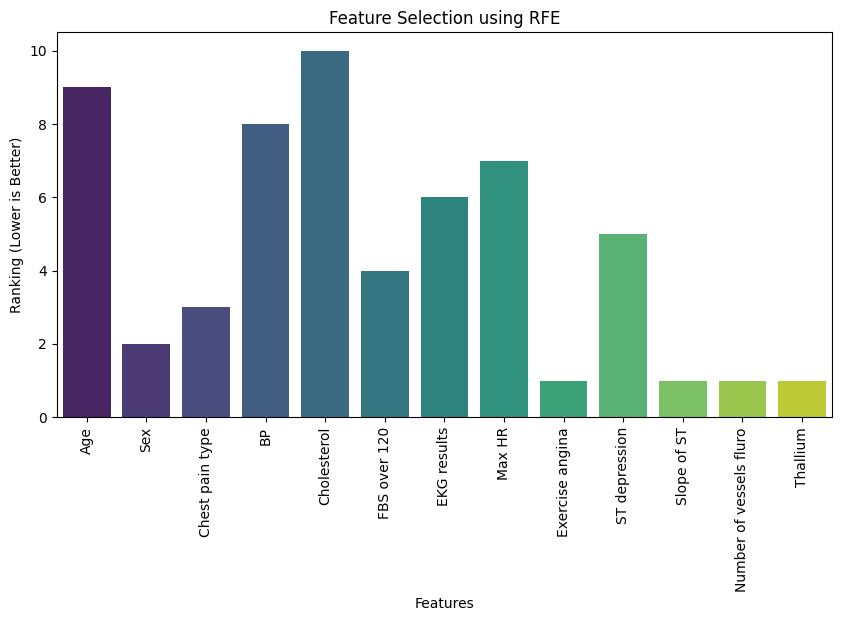

Selected Features (RFE): Index(['Exercise angina', 'Slope of ST', 'Number of vessels fluro',
       'Thallium'],
      dtype='object')


In [445]:
# Initialize base model for RFE (Linear Regression)
rfe_model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rfe_model, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="viridis")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()

print(f"Selected Features (RFE): {selected_features}")








In [446]:
# Initialize SelectKBest with mutual_info_regression for regression task
k_best = SelectKBest(score_func=mutual_info_regression, k=4)  # Select top 4 features
k_best.fit(X, y)

# Get selected feature indices
selected_feature_indices = np.where(k_best.get_support())[0]

# Get feature names (replace 'X.columns' with your column names)
feature_names = X.columns  # Or use the appropriate column names from your data

# Get feature scores
feature_scores = k_best.scores_

# Sort features based on scores in descending order
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]

# Get sorted feature names based on their scores
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print sorted feature scores and names
print("Sorted Feature Scores:")
for i, score in enumerate(sorted_feature_scores):
    print(f"{sorted_feature_names[i]}: {score}")

# Print selected features
print("\nSelected Features (Top 4):")
selected_features = [feature_names[i] for i in selected_feature_indices]
print(selected_features)


Sorted Feature Scores:
Slope of ST: 0.1377162499255964
Thallium: 0.11544816662021251
Chest pain type: 0.10284501586037331
Exercise angina: 0.09454404427489349
ST depression: 0.09137281577454637
Number of vessels fluro: 0.09044803698758397
Cholesterol: 0.05695694328997725
Max HR: 0.04486645408152157
Sex: 0.04361137163079887
EKG results: 0.016201517674546473
FBS over 120: 0.0
BP: 0.0
Age: 0.0

Selected Features (Top 4):
['Chest pain type', 'Exercise angina', 'Slope of ST', 'Thallium']


In [447]:
# Initialize and train the Ridge Regression model with max_iter
lr = Ridge(alpha=10, max_iter= 1000)  # Use Ridge instead of LinearRegression
lr.fit(X_train, y_train)

# Make predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate on Training Data
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate on Test Data
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Training Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"R-squared (R²): {train_r2:.4f}\n")

print("Test Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")


Training Evaluation:
Mean Squared Error (MSE): 0.1162
Mean Absolute Error (MAE): 0.2659
R-squared (R²): 0.5321

Test Evaluation:
Mean Squared Error (MSE): 0.1085
Mean Absolute Error (MAE): 0.2770
R-squared (R²): 0.5434
